# **Un vistazo a los accidentes de tránsito en la ciudad de Bucaramanga con IA**

*Integrantes - Grupo E2*



*   Julián David Pérez Uribe
*   Yonatan Fernando Montañez Araque
*   Juan Sebastián Mantilla Serrano





Carga de librerías y del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
#Montar el drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Nuestro dataset
df = pd.read_csv('/content/drive/MyDrive/Proyecto IA1/Accidentes_de_Transito_ocurridos_en_el_Municipio_de_Bucaramanga_20240914.csv')
print("Numero de registros-columnas:", df.shape)
df.head(10)

Numero de registros-columnas: (39193, 24)


,ORDEN,FECHA,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,...,VOLQUETA,MOTO,BICICLETA,OTRO,BARRIO,HORA,ENTIDAD,COMUNA,Propietario de Vehículo,DIURNIO/NOCTURNO
0,1,01/01/2012,2012,01. Enero,07. Domingo,Con heridos,0,1,0,0,...,0,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,...,0,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,3,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,0,0,1,...,0,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,4,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,...,0,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,5,01/01/2012,2012,01. Enero,07. Domingo,Con heridos,1,0,0,0,...,0,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno
5,6,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,0,...,0,1,0,0,San Miguel,21:10:00,AGENTES DTB,06. LA CONCORDIA,Empresa,Nocturno
6,7,02/01/2012,2012,01. Enero,01. Lunes,Con heridos,1,0,0,0,...,0,0,0,0,La Pedregosa,13:50:00,AGENTES DTB,09. LA PEDREGOSA,Empresa,Diurno
7,8,02/01/2012,2012,01. Enero,01. Lunes,Solo daños,0,0,0,2,...,0,0,0,0,Bucaramanga,19:20:00,AGENTES DTB,08. SUR OCCIDENTE,Particular,Nocturno
8,9,02/01/2012,2012,01. Enero,01. Lunes,Solo daños,0,1,0,0,...,0,0,0,1,Regaderos Norte,12:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
9,10,02/01/2012,2012,01. Enero,01. Lunes,Con heridos,0,1,0,0,...,0,0,0,0,Tejar Norte,16:35:00,AGENTES DTB,01. NORTE,Particular,Diurno


In [ ]:
df.describe()

,ORDEN,AÑO,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO
count,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000
mean,19597.000000,2016.624550,0.105529,0.781262,0.060368,0.197076,0.020284,0.043732,0.048070,0.083331,0.014033,0.626617,0.017682,0.021279
std,11314.188887,3.160996,0.340785,0.742035,0.244827,0.431634,0.142054,0.210890,0.217934,0.287960,0.119138,0.654329,0.133333,0.149867
min,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9799.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19597.000000,2016.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,29395.000000,2019.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,39193.000000,2023.000000,7.000000,29.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,2.000000


In [ ]:
#Borrar columna fecha y hora
df.drop(['FECHA', 'HORA', 'BARRIO'], axis=1, inplace=True)
df.drop(df[df['COMUNA'] == 'NO DISPONIBLE'].index, inplace=True)

# Modificar variables por valores más simples
df.MES.replace({
    '01. Enero': 1,
    '02. Febrero': 2,
    '03. Marzo': 3,
    '04. Abril': 4,
    '05. Mayo': 5,
    '06. Junio': 6,
    '07. Julio': 7,
    '08. Agosto': 8,
    '09. Septiembre': 9,
    '10. Octubre': 10,
    '11. Noviembre': 11,
    '12. Diciembre': 12
}, inplace=True)

df.DÍA.replace({
    '01. Lunes': 1,
    '02. Martes': 2,
    '03. Miercoles': 3,
    '04. Jueves': 4,
    '05. Viernes': 5,
    '06. Sabado': 6,
    '07. Domingo': 7
}, inplace=True)

df['DIURNIO/NOCTURNO'].replace({
    'Diurno': 1,
    'Nocturno': 0
}, inplace=True)

df['GRAVEDAD'] = df['GRAVEDAD'].replace('Con Muertos', 'Con muertos')

df['GRAVEDAD'].replace({
    'Solo daños': 1,
    'Con heridos': 2,
    'Con muertos': 3
}, inplace=True)

df.ENTIDAD.replace({
    'AGENTES DTB': 1,
    'AGENTES POLICIA NACIONAL':2
}, inplace=True)

df.COMUNA.replace({
    'CORREG. 1': 'CORREGIMIENTO',
    'CORREG. 2': 'CORREGIMIENTO',
    'CORREG. 3': 'CORREGIMIENTO'
}, inplace=True)

df.rename(columns={'Propietario de Vehículo': 'Propietario_Vehiculo'}, inplace=True)

df.Propietario_Vehiculo.replace({
    'Particular': 1,
    'Empresa': 2
}, inplace=True)

<ipython-input-5-c3a2e2561dd5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MES.replace({
<ipython-input-5-c3a2e2561dd5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.MES.replace({
<ipython-input-5-c3a2e2561dd5>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or 

In [ ]:
# Conteo de registros y uso del comando describe
print("Número de registros en el archivo CSV:", df.shape[0])
print("Las variables a considerar son:", list(df.columns))
df.head(10)

Número de registros en el archivo CSV: 37640
Las variables a considerar son: ['ORDEN', 'AÑO', 'MES', 'DÍA', 'GRAVEDAD', 'PEATON', 'AUTOMOVIL', 'CAMPERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO', 'ENTIDAD', 'COMUNA', 'Propietario_Vehiculo', 'DIURNIO/NOCTURNO']


,ORDEN,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,...,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,ENTIDAD,COMUNA,Propietario_Vehiculo,DIURNIO/NOCTURNO
0,1,2012,1,7,2,0,1,0,0,0,...,0,0,0,0,0,0,1,17. MUTIS,1,1
1,2,2012,1,7,1,0,1,0,1,0,...,0,0,0,0,0,0,1,02. NORORIENTAL,2,1
2,3,2012,1,7,1,0,0,0,1,0,...,0,0,0,0,0,0,1,12. CABECERA DEL LLANO,1,1
3,4,2012,1,7,1,0,1,0,1,0,...,0,0,0,0,0,0,1,03. SAN FRANCISCO,2,0
4,5,2012,1,7,2,1,0,0,0,0,...,0,0,0,1,0,0,1,11. SUR,1,0
5,6,2012,1,7,1,0,1,0,0,0,...,0,0,0,1,0,0,1,06. LA CONCORDIA,2,0
6,7,2012,1,1,2,1,0,0,0,1,...,0,0,0,0,0,0,1,09. LA PEDREGOSA,2,1
7,8,2012,1,1,1,0,0,0,2,0,...,0,0,0,0,0,0,1,08. SUR OCCIDENTE,1,0
8,9,2012,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,1,02. NORORIENTAL,2,1
9,10,2012,1,1,2,0,1,0,0,0,...,0,0,0,0,0,0,1,01. NORTE,1,1


**Revisión de valores únicos en cada columna**

In [ ]:
for i in df.columns:
  print(i, df[i].unique())

ORDEN [    1     2     3 ... 39190 39191 39193]
AÑO [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
MES [ 1  2  3  4  5  6  7  8  9 10 11 12]
DÍA [7 1 2 3 4 5 6]
GRAVEDAD [2 1 3]
PEATON [0 1 2 3 4 6 5 7]
AUTOMOVIL [ 1  0  2  3  4 17  5 10 13 29]
CAMPERO [0 1 2]
CAMIONETA [0 1 2 3]
MICRO [0 1 2]
BUSETA [0 1 2]
BUS [0 1 2]
CAMION [0 1 2 3]
VOLQUETA [0 1 2]
MOTO [0 1 2 3 4 8 5 7 6]
BICICLETA [0 1 2 3]
OTRO [0 1 2]
ENTIDAD [1 2]
COMUNA ['17. MUTIS' '02. NORORIENTAL' '12. CABECERA DEL LLANO'
 '03. SAN FRANCISCO' '11. SUR' '06. LA CONCORDIA' '09. LA PEDREGOSA'
 '08. SUR OCCIDENTE' '01. NORTE' '10. PROVENZA' '15. CENTRO'
 '13. ORIENTAL' '07. LA CIUDADELA' '04. OCCIDENTAL' 'CORREGIMIENTO'
 '16. LAGOS DEL CACIQUE' '14. MORRORICO' '05. GARCIA ROVIRA']
Propietario_Vehiculo [1 2]
DIURNIO/NOCTURNO [1 0]


**Tipos de dato de cada columna**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37640 entries, 0 to 39192
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ORDEN                 37640 non-null  int64 
 1   AÑO                   37640 non-null  int64 
 2   MES                   37640 non-null  int64 
 3   DÍA                   37640 non-null  int64 
 4   GRAVEDAD              37640 non-null  int64 
 5   PEATON                37640 non-null  int64 
 6   AUTOMOVIL             37640 non-null  int64 
 7   CAMPERO               37640 non-null  int64 
 8   CAMIONETA             37640 non-null  int64 
 9   MICRO                 37640 non-null  int64 
 10  BUSETA                37640 non-null  int64 
 11  BUS                   37640 non-null  int64 
 12  CAMION                37640 non-null  int64 
 13  VOLQUETA              37640 non-null  int64 
 14  MOTO                  37640 non-null  int64 
 15  BICICLETA             37640 non-null  int

**Revisando si hay valores nulos**

In [ ]:
for col in df.columns:
    print (col, np.sum(pd.isnull(df[col])))

ORDEN 0
AÑO 0
MES 0
DÍA 0
GRAVEDAD 0
PEATON 0
AUTOMOVIL 0
CAMPERO 0
CAMIONETA 0
MICRO 0
BUSETA 0
BUS 0
CAMION 0
VOLQUETA 0
MOTO 0
BICICLETA 0
OTRO 0
ENTIDAD 0
COMUNA 0
Propietario_Vehiculo 0
DIURNIO/NOCTURNO 0


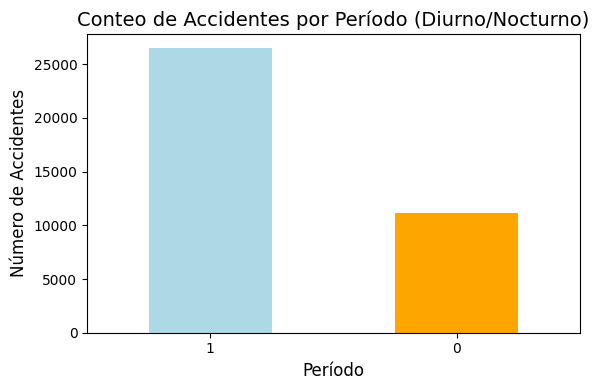

In [ ]:
conteo_periodos = df['DIURNIO/NOCTURNO'].value_counts()

plt.figure(figsize=(6,4))
conteo_periodos.plot(kind='bar', color=['lightblue', 'orange'])

plt.title('Conteo de Accidentes por Período (Diurno/Nocturno)', fontsize=14)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

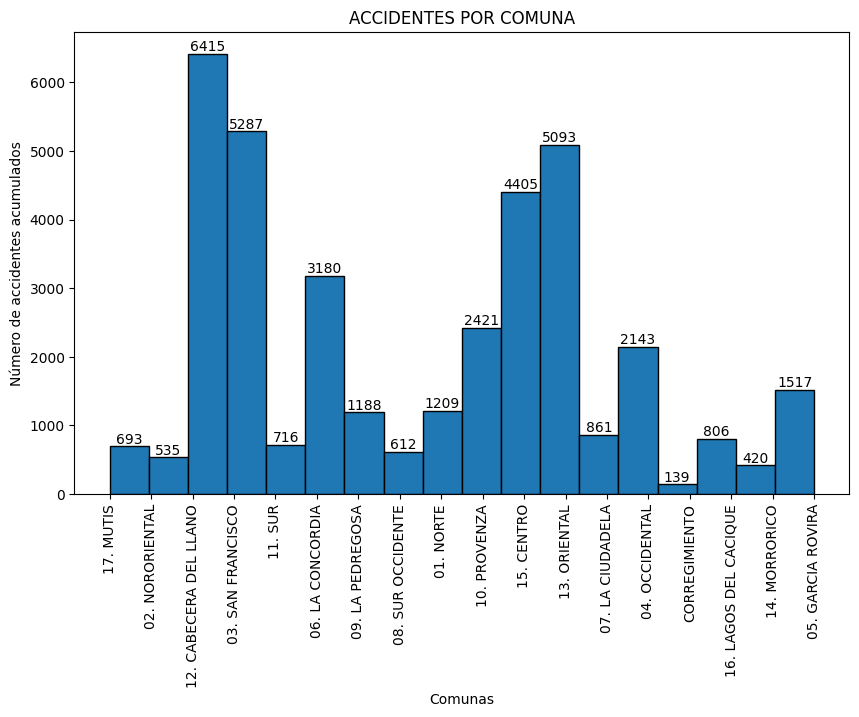

In [ ]:
# SE GENERA UN HISTOGRAMA A PARTIR DE LA GRAVEDAD DE LOS ACCIDENTES
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['COMUNA'], bins=18, edgecolor='black')

for i in range(len(patches)):
  if(n[i] != 0):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], str(int(n[i])),
              ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('Comunas')
plt.ylabel('Número de accidentes acumulados')
plt.title('ACCIDENTES POR COMUNA')

plt.show()

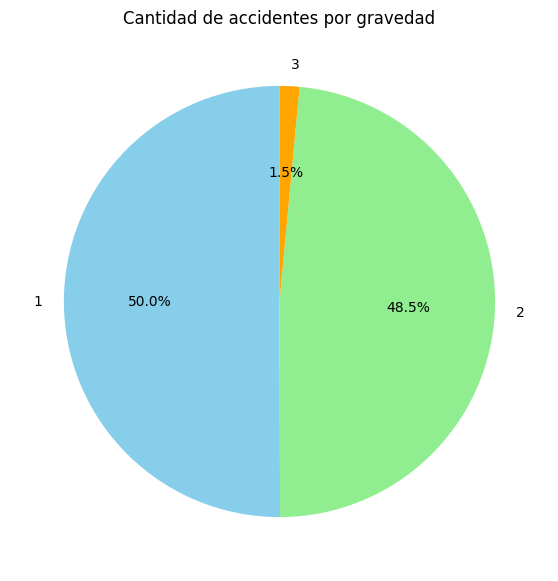

In [ ]:
#SE SELECCIONA LA COLUMNA "COMUNA"
gravedad_counts = df['GRAVEDAD'].value_counts()

# SE CREA EL GRÁFICO DE TORTA
plt.figure(figsize=(7, 7))
plt.pie(gravedad_counts, labels=gravedad_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange'], textprops={'rotation': 0})
plt.title('Cantidad de accidentes por gravedad')
plt.show()

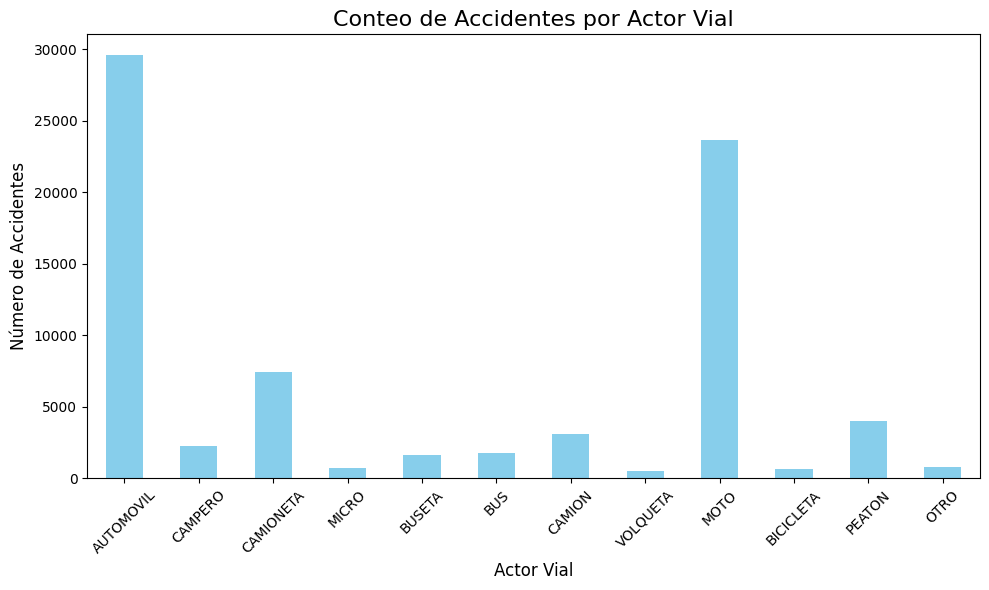

In [ ]:
conteo_accidentes = df[['AUTOMOVIL', 'CAMPERO', 'CAMIONETA', 'MICRO', 'BUSETA',
                        'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA','PEATON', 'OTRO']].sum()

plt.figure(figsize=(10,6))
conteo_accidentes.plot(kind='bar', color='skyblue')

plt.title('Conteo de Accidentes por Actor Vial', fontsize=16)
plt.xlabel('Actor Vial', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Tratamiento de la columna comuna a valores numéricos

df.COMUNA.replace({
    '01. NORTE': 1,
    '02. NORORIENTAL': 2,
    '03. SAN FRANCISCO': 3,
    '04. OCCIDENTAL': 4,
    '05. GARCIA ROVIRA': 5,
    '06. LA CONCORDIA': 6,
    '07. LA CIUDADELA': 7,
    '08. SUR OCCIDENTE': 8,
    '09. LA PEDREGOSA': 9,
    '10. PROVENZA': 10,
    '11. SUR': 11,
    '12. CABECERA DEL LLANO': 12,
    '13. ORIENTAL': 13,
    '14. MORRORICO': 14,
    '15. CENTRO': 15,
    '16. LAGOS DEL CACIQUE': 16,
    '17. MUTIS': 17,
    'CORREGIMIENTO': 18 #consideramos los corregimientos como una comuna #18
}, inplace=True)

<ipython-input-14-c629c2bcd057>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.COMUNA.replace({
<ipython-input-14-c629c2bcd057>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.COMUNA.replace({


<Axes: >

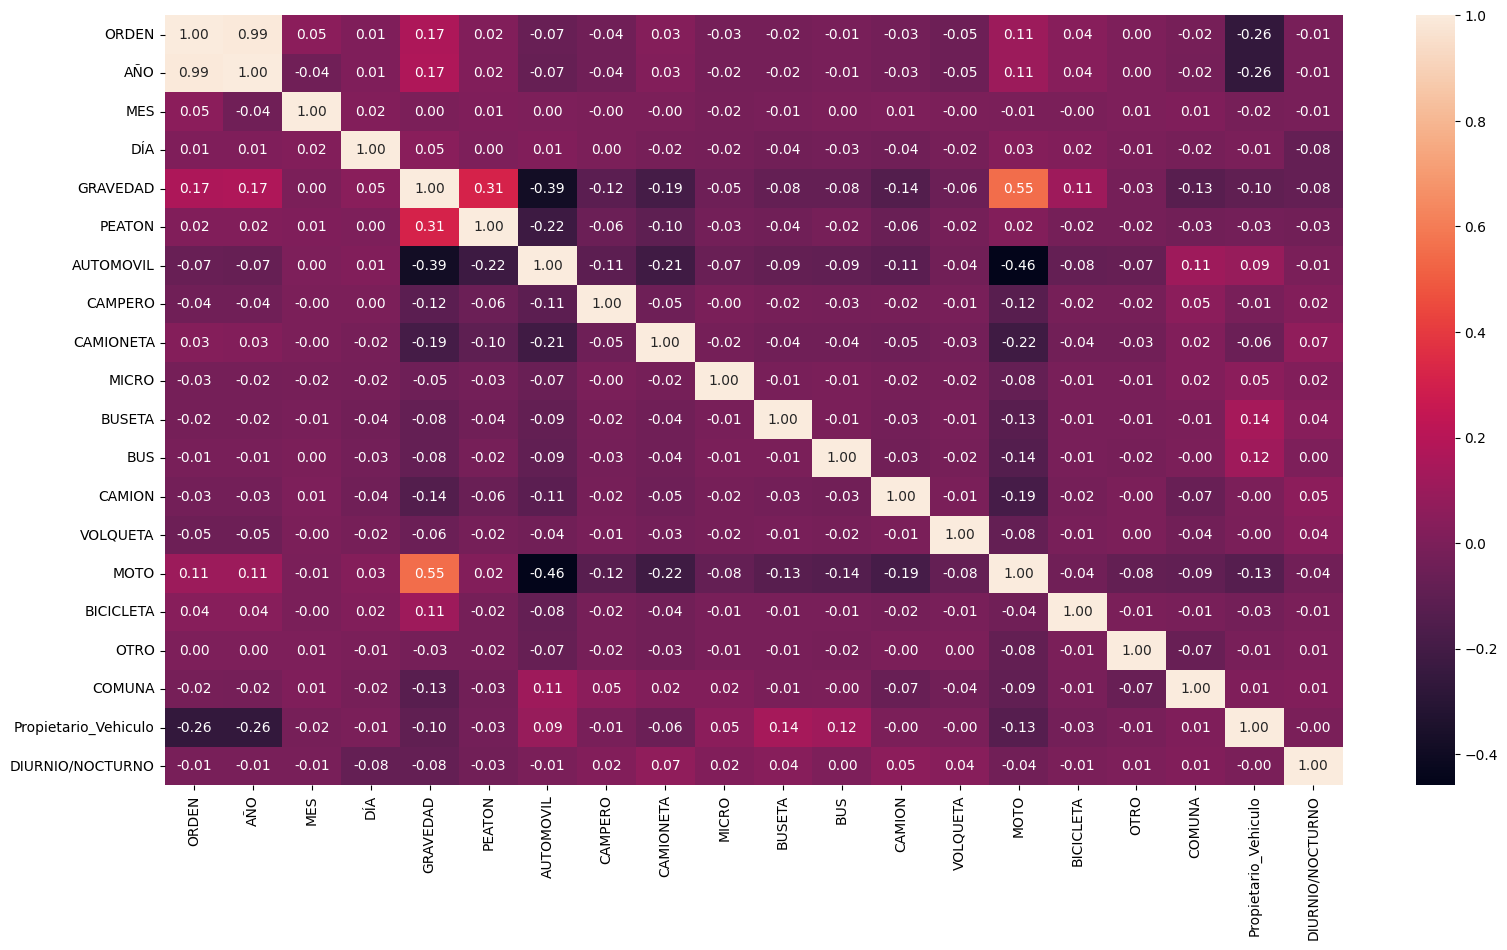

In [ ]:
# Matriz de correlación
plt.subplots(figsize=(19,10))
corr = df[['ORDEN','AÑO','MES','DÍA','GRAVEDAD','PEATON','AUTOMOVIL','CAMPERO','CAMIONETA',
           'MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','OTRO','COMUNA','Propietario_Vehiculo','DIURNIO/NOCTURNO']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

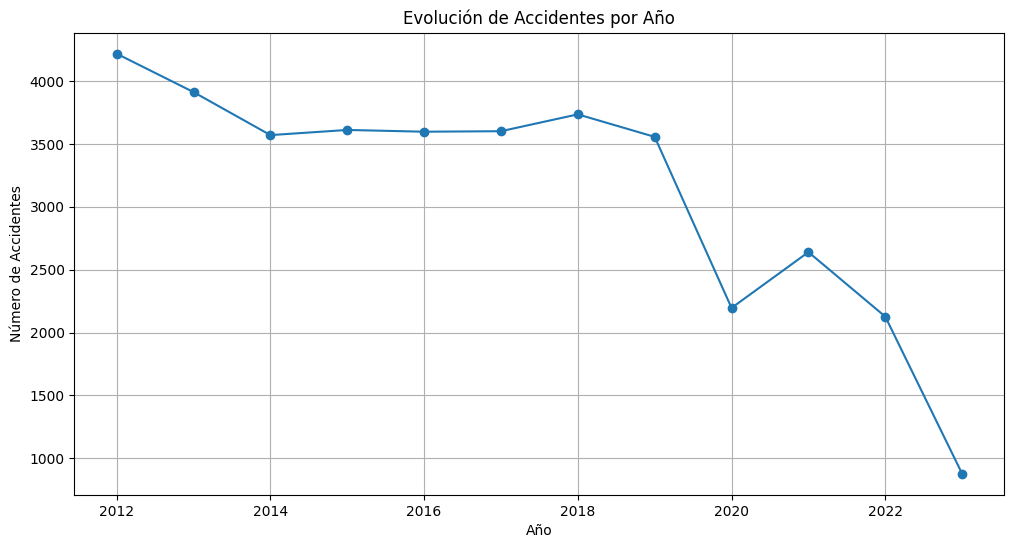

In [ ]:
df_agrupado = df.groupby('AÑO').size().reset_index(name='Total_Accidentes')

# Crear la gráfica de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado['AÑO'], df_agrupado['Total_Accidentes'], marker='o', linestyle='-')
plt.title('Evolución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.show()

# **Parte 2: Uso de estimadores**

En este caso, como vamos a trabajar regresión, usaremos los siguientes estimadores: DecisionTreeRegressor, RandomForestRegressor y SVR

Nuestra finalidad es **predecir la gravedad del accidente** en base al tipo de vehiculo involucrado, periodo del accidente (diurno/nocturno), la comuna donde ocurrió y el mes o día del accidente.

Ahora, procederemos a ejecutar el tuning de parámetros usando train_test_split y cross_val_score con los siguientes estimadores:

- DecisionTreeRegressor (max_depth, criterion)
- RandomForestRegressor (n_estimators, criterion)
- SVR (kernel, gamma)

## DecisionTreeRegressor(max_depth)

**Con train_test_split**

max_depth: 1
MSE: 0.183
RMSE: 0.428
MAE: 0.327
----------------------------------------
max_depth: 2
MSE: 0.149
RMSE: 0.387
MAE: 0.268
----------------------------------------
max_depth: 3
MSE: 0.137
RMSE: 0.370
MAE: 0.247
----------------------------------------
max_depth: 4
MSE: 0.135
RMSE: 0.367
MAE: 0.244
----------------------------------------
max_depth: 5
MSE: 0.134
RMSE: 0.367
MAE: 0.247
----------------------------------------
max_depth: 6
MSE: 0.134
RMSE: 0.366
MAE: 0.245
----------------------------------------
max_depth: 7
MSE: 0.134
RMSE: 0.367
MAE: 0.245
----------------------------------------
max_depth: 8
MSE: 0.136
RMSE: 0.368
MAE: 0.247
----------------------------------------
max_depth: 9
MSE: 0.136
RMSE: 0.369
MAE: 0.245
----------------------------------------
max_depth: 10
MSE: 0.139
RMSE: 0.372
MAE: 0.246
----------------------------------------
max_depth: 11
MSE: 0.141
RMSE: 0.376
MAE: 0.246
----------------------------------------
max_depth: 12
MSE: 0.146
RMSE:

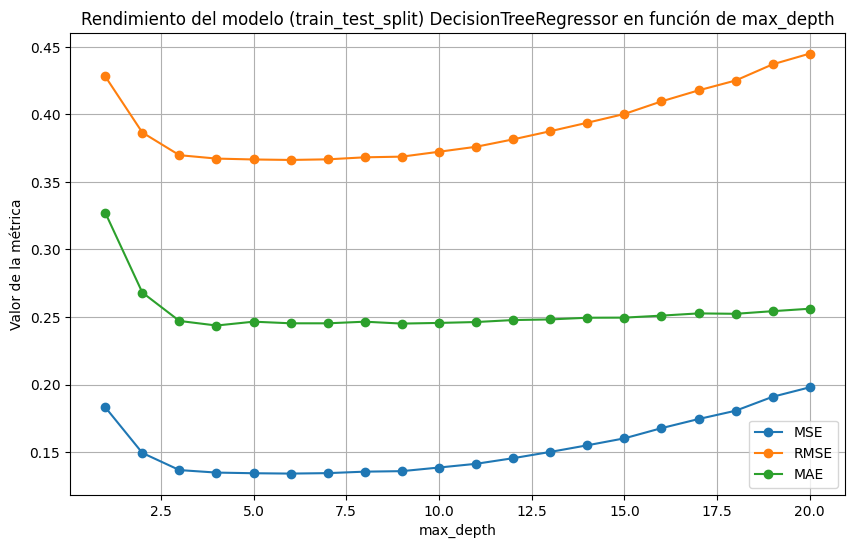

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# Selección de variables predictoras y objetivo
X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Inicializar listas para almacenar las métricas
max_depth_values = range(1, 21)  # Probar diferentes valores de max_depth (1 a 10)
mse_values = []
rmse_values = []
mae_values = []

# Probar diferentes profundidades del árbol
for depth in max_depth_values:
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mse_dt = mean_squared_error(y_test, y_pred)
    rmse_dt = np.sqrt(mse_dt)
    mae_dt = mean_absolute_error(y_test, y_pred)

    mse_values.append(mse_dt)
    rmse_values.append(rmse_dt)
    mae_values.append(mae_dt)

    # Imprimir las métricas para cada profundidad
    print(f"max_depth: {depth}")
    print(f"MSE: {mse_dt:.3f}")
    print(f"RMSE: {rmse_dt:.3f}")
    print(f"MAE: {mae_dt:.3f}")
    print("-" * 40)

# Graficar los resultados
plt.figure(figsize=(10,6))

plt.plot(max_depth_values, mse_values, label='MSE', marker='o')
plt.plot(max_depth_values, rmse_values, label='RMSE', marker='o')
plt.plot(max_depth_values, mae_values, label='MAE', marker='o')

plt.title("Rendimiento del modelo (train_test_split) DecisionTreeRegressor en función de max_depth")
plt.xlabel("max_depth")
plt.ylabel("Valor de la métrica")
plt.legend()
plt.grid(True)
plt.show()

**Con cross_val_score**

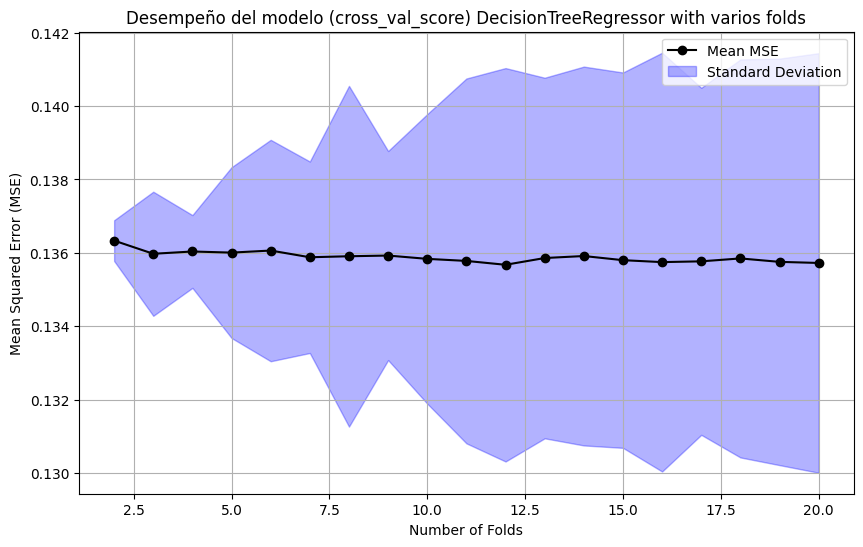

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Selección de variables predictoras y objetivo
X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

# Configuración del modelo y parámetros
def show_curve_with_folds(estimator, X, y):
    means, stds = [], []
    nfolds_range = range(2, 21)  # Evaluar desde 2 hasta 10 particiones (folds)

    for nfolds in nfolds_range:
        # Configuración de validación cruzada con KFold
        kf = KFold(n_splits=nfolds, shuffle=True, random_state=21)

        # Evaluar el modelo con cross_val_score usando MSE
        scores = cross_val_score(estimator, X, y, cv=kf, scoring='neg_mean_squared_error')

        # Convertir los valores negativos a positivos
        mse_values = -scores
        means.append(np.mean(mse_values))
        stds.append(np.std(mse_values))

    # Convertir listas a arrays para graficar
    means = np.array(means)
    stds = np.array(stds)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(nfolds_range, means, label="Mean MSE", color="black", marker='o')
    plt.fill_between(nfolds_range, means - stds, means + stds, color="blue", alpha=0.3, label="Standard Deviation")

    plt.title("Desempeño del modelo (cross_val_score) DecisionTreeRegressor with varios folds")
    plt.xlabel("Number of Folds")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

show_curve_with_folds(DecisionTreeRegressor(max_depth=5), X, y)

## RandomForest(n_estimators)

**Con train_test_split**

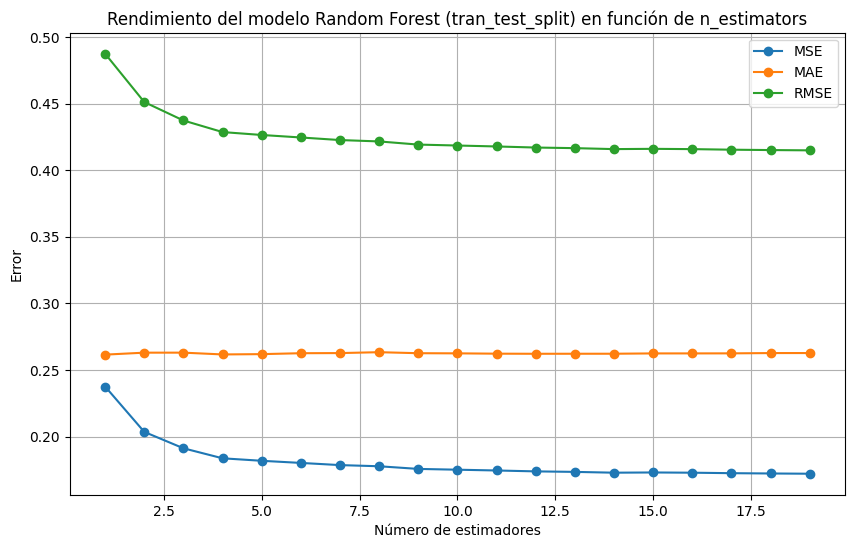

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators = range(1, 20)
mse_values = []
mae_values = []

for n in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=21)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    mse_values.append(mean_squared_error(y_test, y_pred))
    mae_values.append(mean_absolute_error(y_test, y_pred))

rmse_values = [np.sqrt(mse) for mse in mse_values]

# Se grafican las metricas
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mse_values, label='MSE', marker='o')
plt.plot(n_estimators, mae_values, label='MAE', marker='o')
plt.plot(n_estimators, rmse_values, label='RMSE', marker='o')

plt.title("Rendimiento del modelo Random Forest (tran_test_split) en función de n_estimators")
plt.xlabel("Número de estimadores")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

**Con cross_val_score**

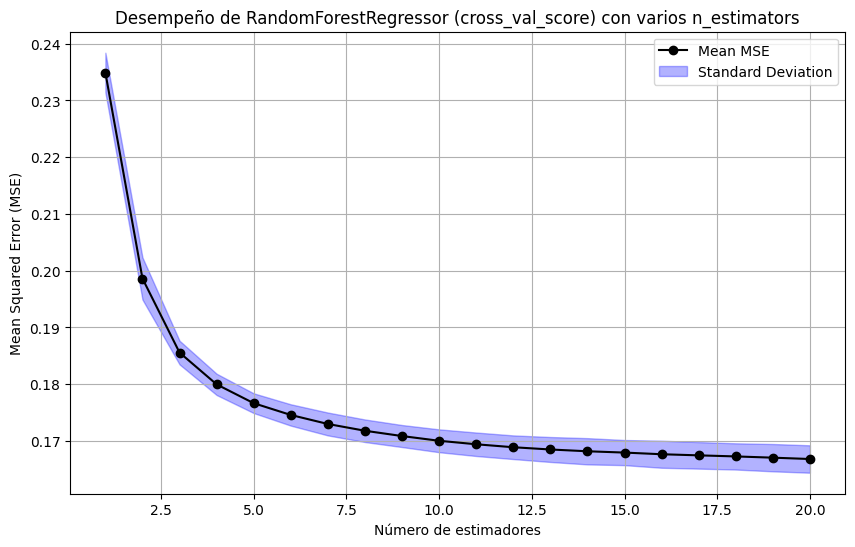

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

# Configuración del modelo y parámetros
def show_curve_with_estimators(X, y):
    n_estimators = range(1, 21)
    mean_mse_values = []
    std_mse_values = []

    kf = KFold(n_splits=5, shuffle=True, random_state=21)

    for n in n_estimators:
        rf_regressor = RandomForestRegressor(n_estimators=n, random_state=21)

        mse_scores = -cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

        mean_mse_values.append(np.mean(mse_scores))
        std_mse_values.append(np.std(mse_scores))


    mean_mse_values = np.array(mean_mse_values)
    std_mse_values = np.array(std_mse_values)

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, mean_mse_values, label="Mean MSE", color="black", marker='o')
    plt.fill_between(n_estimators, mean_mse_values - std_mse_values, mean_mse_values + std_mse_values,
                     color="blue", alpha=0.3, label="Standard Deviation")

    plt.title("Desempeño de RandomForestRegressor (cross_val_score) con varios n_estimators")
    plt.xlabel("Número de estimadores")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función
show_curve_with_estimators(X, y)


## SVR

**Con train_test_split**

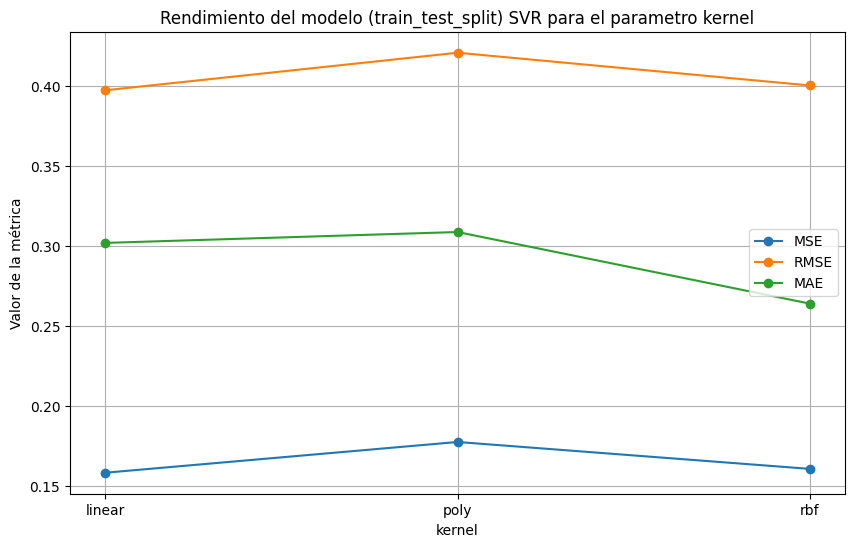

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Selección de variables predictoras y objetivo
X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

# Se divide el dataset en conjunto de test y prueba con una proporcion (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

kernels = ['linear', 'poly', 'rbf']
mse_values, rmse_values, mae_values = [], [], []

for kernel in kernels:

  svr = SVR(kernel=kernel)
  svr.fit(X_train, y_train)
  y_pred = svr.predict(X_test)

  mse_dt = mean_squared_error(y_test, y_pred)
  rmse_dt = np.sqrt(mse_dt)
  mae_dt = mean_absolute_error(y_test, y_pred)

  mse_values.append(mse_dt)
  rmse_values.append(rmse_dt)
  mae_values.append(mae_dt)

# Graficar los resultados
plt.figure(figsize=(10,6))

plt.plot(kernels, mse_values, label='MSE', marker='o')
plt.plot(kernels, rmse_values, label='RMSE', marker='o')
plt.plot(kernels, mae_values, label='MAE', marker='o')

plt.title("Rendimiento del modelo (train_test_split) SVR para el parametro kernel")
plt.xlabel("kernel")
plt.ylabel("Valor de la métrica")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Selección de variables predictoras y objetivo
X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

# Se divide el dataset en conjunto de test y prueba con una proporcion (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

kernels = ['linear', 'poly', 'rbf']
gammas = ['scale', 'auto']
mse_values, rmse_values, mae_values = [], [], []

results = []

for kernel in kernels:
    for gamma in gammas:
        svr = SVR(kernel=kernel, gamma=gamma)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)

        mse_dt = mean_squared_error(y_test, y_pred)
        rmse_dt = np.sqrt(mse_dt)
        mae_dt = mean_absolute_error(y_test, y_pred)

        mse_values.append(mse_dt)
        rmse_values.append(rmse_dt)
        mae_values.append(mae_dt)

        results.append((kernel, gamma, mse_dt, rmse_dt, mae_dt))

# Mostrar resultados
for kernel, gamma, mse, rmse, mae in results:
    print(f"Kernel: {kernel}, Gamma: {gamma}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# Graficar resultados
plt.figure(figsize=(10, 6))

x_labels = [f"{k}-{g}" for k in kernels for g in gammas]

plt.plot(x_labels, mse_values, label='MSE', marker='o')
plt.plot(x_labels, rmse_values, label='RMSE', marker='o')
plt.plot(x_labels, mae_values, label='MAE', marker='o')

plt.title("Rendimiento del modelo (train_test_split) SVR para los parametros kernel y gamma")
plt.xlabel("Combinación de kernel y gamma")
plt.ylabel("Valor de la métrica")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Este bloque de código anterior demora demasiado tiempo en correr

**Con cross_val_score**

2
3
4
5
6
7
8
9


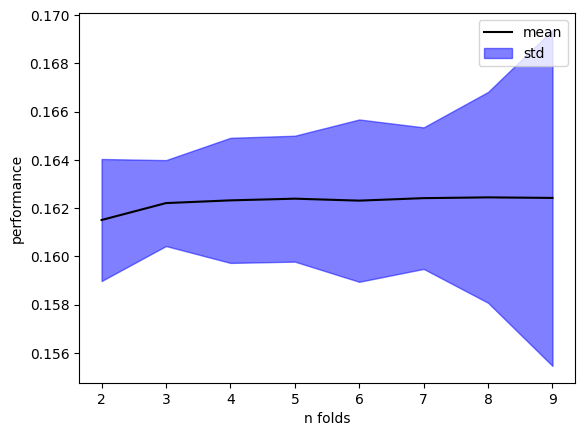

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.datasets import make_regression

X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

means, stds = [], []
nfolds_range = range(2,10)
est = SVR()

for nfolds in nfolds_range:
    print (nfolds)
    s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
    means.append(np.mean(s))
    stds.append(np.std(s))

means = np.r_[means]
stds  = np.r_[stds]

plt.plot(nfolds_range, means, label="mean", color="black")
plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
plt.xlabel("n folds")
plt.ylabel("performance")
plt.legend()

# **Parte 3: Implementación de un perceptrón multicapa**

Recordemos que tras normalizar los valores de algunas variables, en este caso, la variable **GRAVEDAD** obtiene los siguientes valores:



*   Solo daños: 1
*   Con heridos: 2
*   Con muertos: 3

**Perceptrón multicapa con 3 capas ocultas**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.4354 - val_loss: 0.2101
Epoch 2/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2149 - val_loss: 0.1891
Epoch 3/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1958 - val_loss: 0.2020
Epoch 4/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1928 - val_loss: 0.1804
Epoch 5/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1867 - val_loss: 0.1806
Epoch 6/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1827 - val_loss: 0.1806
Epoch 7/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1800 - val_loss: 0.1786
Epoch 8/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1819 - val_loss: 0.1749
Epoch 9/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1785 - val_loss: 0.1729
Epoch 10/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1794 - val_loss: 0.1738
Epoch 11/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1829 - val_loss: 0.1733
Epoch 12/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

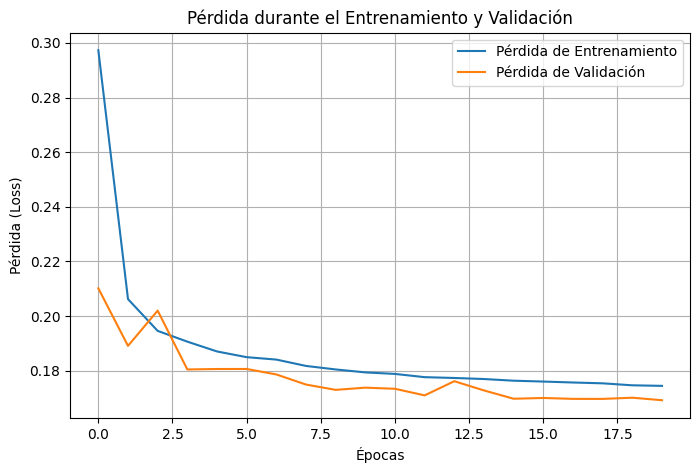

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Normalización de datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Modelo con 3 capas ocultas

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test)

print('\n')

# Calcular el MAE con valores continuos
mae_continuo = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error en los valores continuos: {mae_continuo:.4f}")

# Se redondean las predicciones al entero más cercano
y_pred_rounded = y_pred.round()
y_pred_rounded = y_pred_rounded.clip(1, 3)

# Calcular el MAE con valores redondeados
mae_redondeado = mean_absolute_error(y_test, y_pred_rounded)
print(f"Mean Absolute Error en los valores redondeados: {mae_redondeado:.4f}")

results = pd.DataFrame({
    'Real': y_test.values,
    'Predicción Continua': y_pred.flatten(),
    'Predicción Redondeada': y_pred_rounded.flatten()
})

print('\n')
print(results.head(20))
print('\n')

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(X_train.shape)

(30112, 15)


**Perceptrón multicapa con 6 capas ocultas**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.3849 - val_loss: 0.2003
Epoch 2/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1956 - val_loss: 0.1799
Epoch 3/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1878 - val_loss: 0.1807
Epoch 4/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1835 - val_loss: 0.1779
Epoch 5/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1798 - val_loss: 0.1728
Epoch 6/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1799 - val_loss: 0.1752
Epoch 7/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1801 - val_loss: 0.1713
Epoch 8/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1771 - val_loss: 0.1775
Epoch 9/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1801 - val_loss: 0.1737
Epoch 10/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1781 - val_loss: 0.1737
Epoch 11/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1784 - val_loss: 0.1714
Epoch 12/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

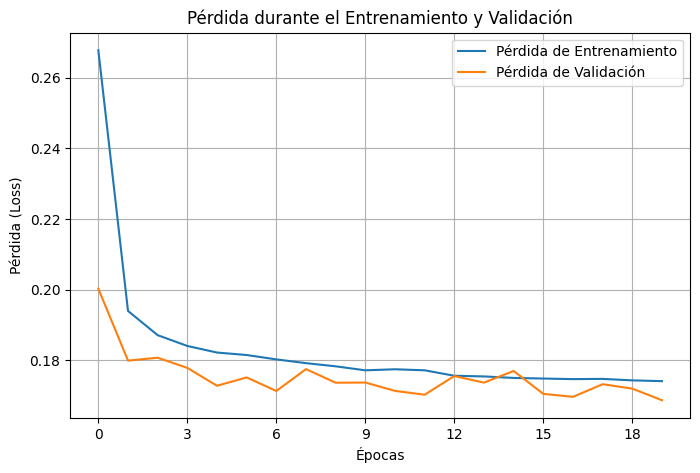

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib.ticker import MaxNLocator

X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Normalización de datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Modelo con 6 capas ocultas
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


model.compile(optimizer='adam', loss='mean_absolute_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

y_pred_continuous = model.predict(X_test)
y_pred_rounded = y_pred_continuous.round()

mae_continuous = mean_absolute_error(y_test, y_pred_continuous)
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)

print('\n')

print(f"Mean Absolute Error (MAE) en valores continuos: {mae_continuous:.4f}")
print(f"Mean Absolute Error (MAE) con valores redondeados: {mae_rounded:.4f}")

results2 = pd.DataFrame({
    'Real': y_test.values,
    'Predicción Continua': y_pred_continuous.flatten(),
    'Predicción Redondeada': y_pred_rounded.flatten()
})

print('\n')
print(results2.head(20))
print('\n')

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.grid(True)
plt.show()

**Perceptrón multicapa con 10 capas ocultas**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.4837 - val_loss: 0.2101
Epoch 2/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1966 - val_loss: 0.1759
Epoch 3/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1870 - val_loss: 0.1763
Epoch 4/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1855 - val_loss: 0.1714
Epoch 5/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1794 - val_loss: 0.1765
Epoch 6/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1844 - val_loss: 0.1853
Epoch 7/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1759 - val_loss: 0.1713
Epoch 8/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1774 - val_loss: 0.1735
Epoch 9/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1756 - val_loss: 0.1725
Epoch 10/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1775 - val_loss: 0.1731
Epoch 11/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1736 - val_loss: 0.1694
Epoch 12/20
753/753 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/ste

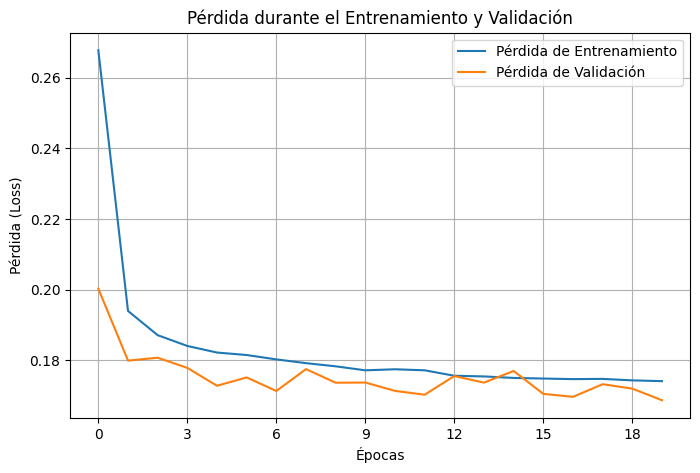

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

X = df[['AUTOMOVIL','CAMPERO','CAMIONETA','MICRO','BUSETA','BUS','CAMION','VOLQUETA','MOTO','BICICLETA','PEATON','DIURNIO/NOCTURNO','COMUNA', 'MES', 'DÍA']]
y = df['GRAVEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Normalización de datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Modelo con 10 capas ocultas
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

y_pred_continuous = model.predict(X_test)
y_pred_rounded = y_pred_continuous.round()

mae_continuous = mean_absolute_error(y_test, y_pred_continuous)
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)

print('\n')

print(f"Mean Absolute Error (MAE) en valores continuos: {mae_continuous:.4f}")
print(f"Mean Absolute Error (MAE) con valores redondeados: {mae_rounded:.4f}")

results3 = pd.DataFrame({
    'Real': y_test.values,
    'Predicción Continua': y_pred_continuous.flatten(),
    'Predicción Redondeada': y_pred_rounded.flatten()
})

print('\n')
print(results3.head(20))
print('\n')

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.grid(True)
plt.show()

# **Conclusiones**

A pesar de que lo ideal sea que el dataset contenga variables relacionadas a las personas involucradas en cualquier tipo de accidente para dar una mejor solidez a la predicción, el modelo está haciendo en su mayoria predicciones que no están lejanas al contexto del problema y es un modelo que a futuro está abierto a muchas mejoras si se quiere analizar la accidentalidad en Bucaramanga.